In [6]:
pip install scikit-fuzzy

===== KẾT QUẢ THEO DÕI BỆNH NHÂN =====
Drug Dosage   (0..100): 56.42857142857141
IV Rate       (0..100): 39.845360824742286
Oxy Therapy   (0..100): 49.99999999999997


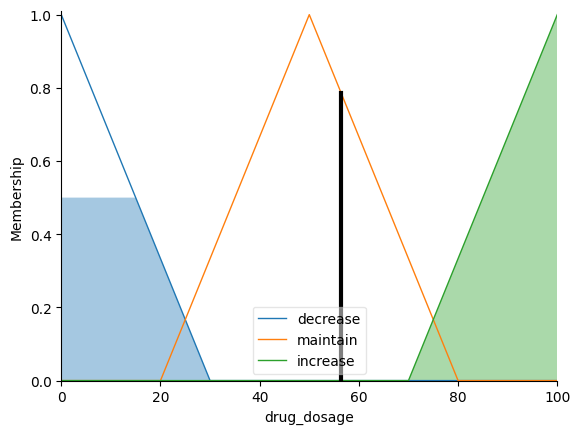

In [13]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

heart_rate     = ctrl.Antecedent(np.arange(0, 181, 1), 'heart_rate')
blood_pressure = ctrl.Antecedent(np.arange(60, 201, 1), 'blood_pressure')
body_temp      = ctrl.Antecedent(np.arange(34, 43, 1), 'body_temp')
spo2           = ctrl.Antecedent(np.arange(80, 101, 1), 'spo2')
blood_sugar    = ctrl.Antecedent(np.arange(50, 301, 1), 'blood_sugar')

heart_rate['low']    = fuzz.trapmf(heart_rate.universe, [0, 0, 50, 60])
heart_rate['normal'] = fuzz.trimf(heart_rate.universe, [60, 80, 100])
heart_rate['high']   = fuzz.trapmf(heart_rate.universe, [100, 120, 180, 180])

blood_pressure['low']    = fuzz.trapmf(blood_pressure.universe, [60, 60, 80, 90])
blood_pressure['normal'] = fuzz.trimf(blood_pressure.universe, [90, 110, 130])
blood_pressure['high']   = fuzz.trapmf(blood_pressure.universe, [130, 150, 200, 200])

body_temp['low']    = fuzz.trapmf(body_temp.universe, [34, 34, 35.5, 36])
body_temp['normal'] = fuzz.trimf(body_temp.universe, [36, 37, 37.5])
body_temp['high']   = fuzz.trapmf(body_temp.universe, [37.5, 38, 42, 42])

spo2['low']    = fuzz.trapmf(spo2.universe, [80, 80, 88, 90])
spo2['normal'] = fuzz.trapmf(spo2.universe, [90, 95, 100, 100])

blood_sugar['low']    = fuzz.trapmf(blood_sugar.universe, [50, 50, 60, 70])
blood_sugar['normal'] = fuzz.trimf(blood_sugar.universe, [70, 105, 140])
blood_sugar['high']   = fuzz.trapmf(blood_sugar.universe, [140, 180, 300, 300])

drug_dosage = ctrl.Consequent(np.arange(0, 101, 1), 'drug_dosage')
drug_dosage['decrease'] = fuzz.trimf(drug_dosage.universe, [0, 0, 30])
drug_dosage['maintain'] = fuzz.trimf(drug_dosage.universe, [20, 50, 80])
drug_dosage['increase'] = fuzz.trimf(drug_dosage.universe, [70, 100, 100])

dd_rule1 = ctrl.Rule(heart_rate['low'] & blood_pressure['low'],
                     drug_dosage['increase'])

dd_rule2 = ctrl.Rule(heart_rate['high'] & blood_pressure['high'],
                     drug_dosage['decrease'])

dd_rule3 = ctrl.Rule(heart_rate['normal'] & blood_pressure['normal'],
                     drug_dosage['maintain'])

dd_rule4 = ctrl.Rule(body_temp['high'], drug_dosage['increase'])

dd_rule5 = ctrl.Rule(spo2['low'], drug_dosage['increase'])

dd_rule6 = ctrl.Rule(blood_sugar['high'], drug_dosage['increase'])

dd_rule7 = ctrl.Rule(blood_sugar['low'], drug_dosage['decrease'])

drug_dosage_ctrl = ctrl.ControlSystem(
    [dd_rule1, dd_rule2, dd_rule3, dd_rule4, dd_rule5, dd_rule6, dd_rule7]
)
drug_dosage_sim = ctrl.ControlSystemSimulation(drug_dosage_ctrl)
iv_rate = ctrl.Consequent(np.arange(0, 101, 1), 'iv_rate')
iv_rate['decrease'] = fuzz.trimf(iv_rate.universe, [0, 0, 30])
iv_rate['maintain'] = fuzz.trimf(iv_rate.universe, [20, 50, 80])
iv_rate['increase'] = fuzz.trimf(iv_rate.universe, [70, 100, 100])

iv_rule1 = ctrl.Rule(heart_rate['low'] & blood_pressure['low'], iv_rate['increase'])

iv_rule2 = ctrl.Rule(heart_rate['high'], iv_rate['decrease'])

iv_rule3 = ctrl.Rule(spo2['low'] & body_temp['high'], iv_rate['maintain'])

iv_rule4 = ctrl.Rule(blood_sugar['high'], iv_rate['maintain'])

iv_rule5 = ctrl.Rule(
    heart_rate['normal'] & blood_pressure['normal'] & spo2['normal'] & body_temp['normal'] & blood_sugar['normal'],
    iv_rate['maintain']
)

iv_rate_ctrl = ctrl.ControlSystem([iv_rule1, iv_rule2, iv_rule3, iv_rule4, iv_rule5])
iv_rate_sim = ctrl.ControlSystemSimulation(iv_rate_ctrl)

oxy_therapy = ctrl.Consequent(np.arange(0, 101, 1), 'oxy_therapy')
oxy_therapy['decrease'] = fuzz.trimf(oxy_therapy.universe, [0, 0, 30])
oxy_therapy['maintain'] = fuzz.trimf(oxy_therapy.universe, [20, 50, 80])
oxy_therapy['increase'] = fuzz.trimf(oxy_therapy.universe, [70, 100, 100])

oxy_rule1 = ctrl.Rule(spo2['low'], oxy_therapy['increase'])

oxy_rule2 = ctrl.Rule(body_temp['high'] & heart_rate['high'], oxy_therapy['increase'])

oxy_rule3 = ctrl.Rule(blood_pressure['high'], oxy_therapy['decrease'])

oxy_rule4 = ctrl.Rule(
    heart_rate['normal'] & blood_pressure['normal'] & body_temp['normal'] & spo2['normal'] & blood_sugar['normal'],
    oxy_therapy['maintain']
)

oxy_therapy_ctrl = ctrl.ControlSystem([oxy_rule1, oxy_rule2, oxy_rule3, oxy_rule4])
oxy_therapy_sim = ctrl.ControlSystemSimulation(oxy_therapy_ctrl)

test_inputs = {
    'heart_rate':     110,
    'blood_pressure': 150,
    'body_temp':      38.5,
    'spo2':           88,
    'blood_sugar':    190
}

drug_dosage_sim.input['heart_rate']     = test_inputs['heart_rate']
drug_dosage_sim.input['blood_pressure'] = test_inputs['blood_pressure']
drug_dosage_sim.input['body_temp']      = test_inputs['body_temp']
drug_dosage_sim.input['spo2']           = test_inputs['spo2']
drug_dosage_sim.input['blood_sugar']    = test_inputs['blood_sugar']
drug_dosage_sim.compute()

iv_rate_sim.input['heart_rate']     = test_inputs['heart_rate']
iv_rate_sim.input['blood_pressure'] = test_inputs['blood_pressure']
iv_rate_sim.input['body_temp']      = test_inputs['body_temp']
iv_rate_sim.input['spo2']           = test_inputs['spo2']
iv_rate_sim.input['blood_sugar']    = test_inputs['blood_sugar']
iv_rate_sim.compute()

oxy_therapy_sim.input['heart_rate']     = test_inputs['heart_rate']
oxy_therapy_sim.input['blood_pressure'] = test_inputs['blood_pressure']
oxy_therapy_sim.input['body_temp']      = test_inputs['body_temp']
oxy_therapy_sim.input['spo2']           = test_inputs['spo2']
oxy_therapy_sim.input['blood_sugar']    = test_inputs['blood_sugar']
oxy_therapy_sim.compute()

print("===== KẾT QUẢ THEO DÕI BỆNH NHÂN =====")
print("Drug Dosage   (0..100):", drug_dosage_sim.output['drug_dosage'])
print("IV Rate       (0..100):", iv_rate_sim.output['iv_rate'])
print("Oxy Therapy   (0..100):", oxy_therapy_sim.output['oxy_therapy'])
drug_dosage.view(sim=drug_dosage_sim)
